In [16]:
import pandas as pd
import geopandas
%matplotlib inline

<Axes: >

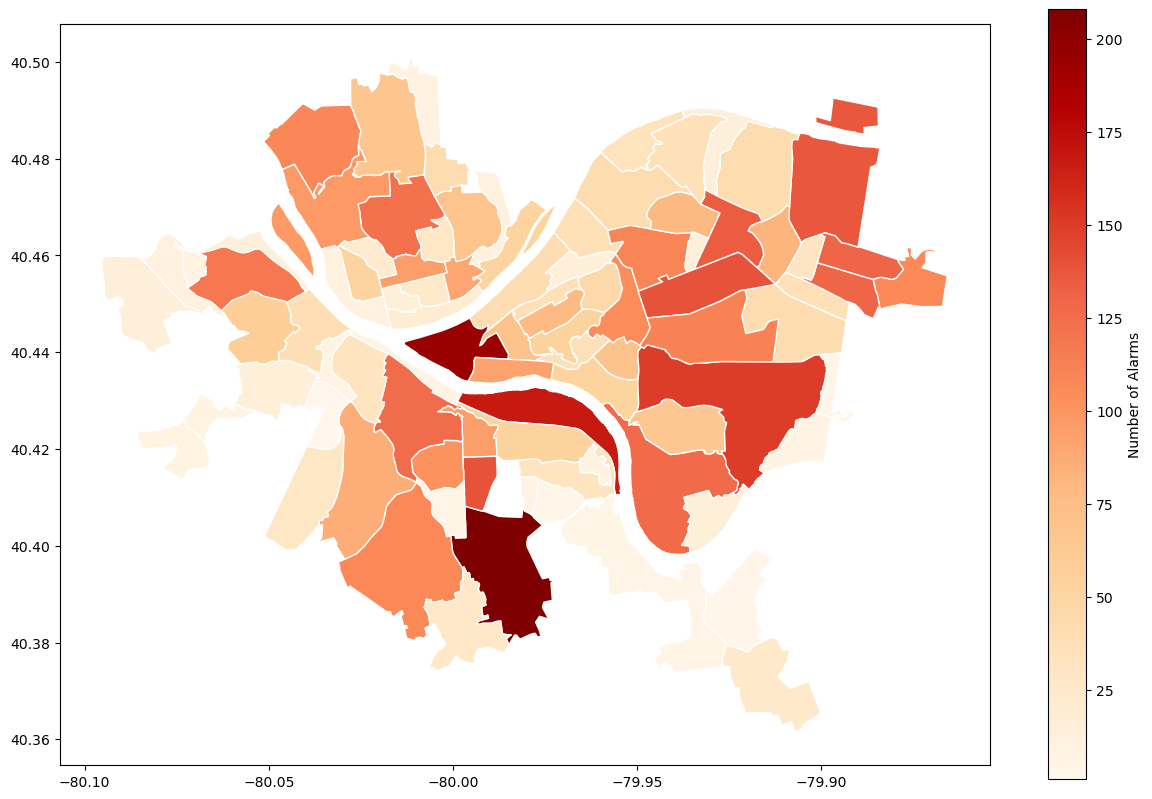

In [36]:
incidents = pd.read_csv("incidents.csv")
num_alarms = incidents.groupby("neighborhood").sum()['alarms']
num_alarms.sort_values(ascending=False)
neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp") # read in the shapefile
incidents_map = neighborhoods.merge(num_alarms, how='left', left_on='hood', right_on='neighborhood')
incidents_map.plot(column='alarms', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Alarms"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [33]:
num_alarms = incidents.groupby("neighborhood").sum()['alarms']
num_alarms.sort_values(ascending=False)

neighborhood
Carrick                      208
Central Business District    194
South Side Flats             168
Squirrel Hill South          150
Shadyside                    139
                            ... 
St. Clair                      4
Regent Square                  4
New Homestead                  4
Mount Oliver Borough           2
Ridgemont                      1
Name: alarms, Length: 91, dtype: int64

In [38]:
fire_scores = (1 - (num_alarms - num_alarms.min()) / (num_alarms.max() - num_alarms.min())) * 10
fire_scores = fire_scores.reset_index()
fire_scores.columns = ['neighborhood', 'fire_score']
print(fire_scores)

           neighborhood  fire_score
0      Allegheny Center    0.879227
1        Allegheny West    0.932367
2             Allentown    0.545894
3             Arlington    0.845411
4     Arlington Heights    0.956522
..                  ...         ...
86  Upper Lawrenceville    0.840580
87             West End    0.966184
88         West Oakland    0.826087
89             Westwood    0.932367
90              Windgap    0.951691

[91 rows x 2 columns]


In [39]:
safest_neighborhood = fire_scores.loc[fire_scores['fire_score'].idxmax(), 'neighborhood']
safest_score = fire_scores['fire_score'].max()

print(f"The safest neighborhood is {safest_neighborhood} with a fire score of {safest_score:.2f}.")

The safest neighborhood is Ridgemont with a fire score of 1.00.
